In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.io import read_image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# Load and preprocess the image
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
    ])
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    return image_tensor

In [3]:
image_path = 'dog.tiff'  # Update with the path to your image
image_tensor = load_image(image_path)
image_tensor.size()

torch.Size([1, 3, 224, 224])

In [4]:
# Model
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(in_channels=3, out_channels=768, kernel_size=16, stride=16)

    def forward(self, x):
        x = self.conv(x)
        return x

model = ConvNet() 

In [5]:
with torch.no_grad():
    output = model(image_tensor)

In [6]:
output.size()

torch.Size([1, 768, 14, 14])

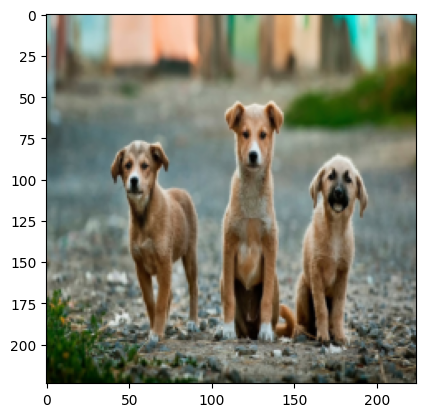

In [7]:
plt.imshow(image_tensor.squeeze(0).permute(1,2,0).numpy())

In [8]:
feature_map = output.squeeze(0)
num_filters = feature_map.shape[0]
num_filters

768

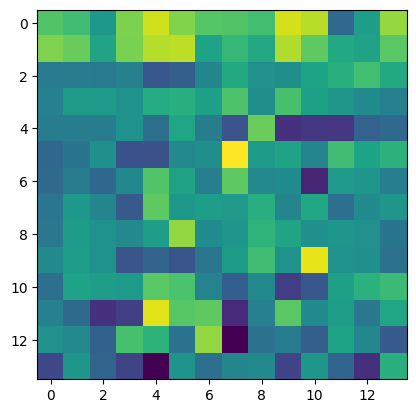

In [9]:
# first feature map
plt.imshow(feature_map[1,:,:].numpy())

IndexError: index 100 is out of bounds for axis 0 with size 100

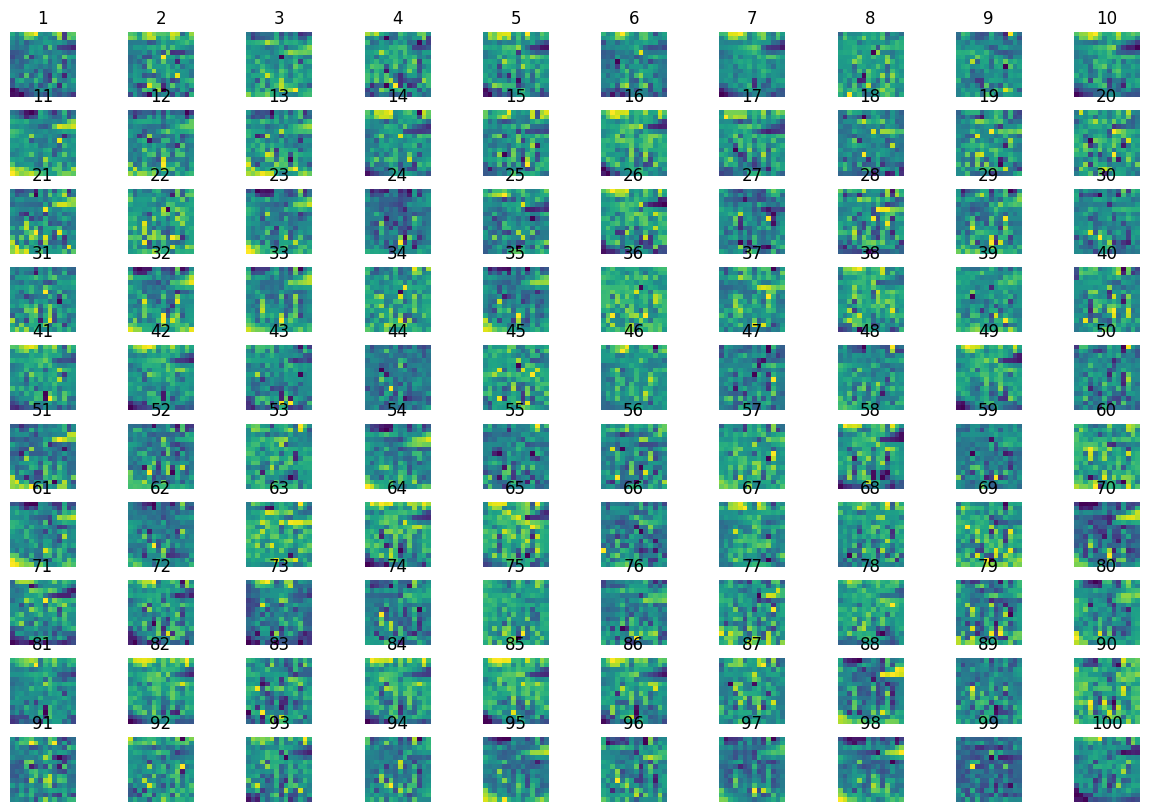

In [10]:
# Plot the feature maps
fig, axes = plt.subplots( 10,10, figsize=(15, 10))
axes = axes.flatten()
for i in range(num_filters):
    ax = axes[i]
    ax.imshow(feature_map[i, :, :].numpy(), cmap='viridis')
    ax.set_title(f'{i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()